<a href="https://colab.research.google.com/github/dmorenoburgo/proyecto_prediccion_fallo_sensores/blob/main/Predicci%C3%B3n_de_fallo_de_sensores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicción de fallo de sensores**

## Objetivo
El objetivo de este proycto es desarrollar un modelo de Machine Learning capaz de predecir fallos en máquinas industriales utilizando datos proporcionados por múltiples sensores. Al identificar patrones que preceden a un fallo, el modelo ayudará a implementar mantenimiento predictivo, optimizando los tiempo de operación y reduciendo el tiempo de inactividad de las máquinas.

## Fuente del Dataset
El conjunto de datos fue obtenido de [Kaggle](https://https://www.kaggle.com/): [Machine Failure Prediction using Sensor Data](https://www.kaggle.com/datasets/umerrtx/machine-failure-prediction-using-sensor-data/data)

## Descripción del Dataset

Este dataset contiene datos recogidos por sensores de varias máquinas. Contiene una variedad de mediciones de sensores además de resgistros de fallos en la maquinaria.

### Descripción de las columnas
* **footfall:** Número de personas u objetos que pasan cerca de la máquina.
* **tempMode:** El modo o configuración de temperatura de la máquina.
* **AQ:** Índice de calidad del aire en las proximidades de la máquina.
* **USS:** Medición de proximidad proporcionada por un sensor de ultrasonidos.
* **CS:** Medición de corriente eléctrica usada por la máquina.
* **VOC:** Nivel de compuestos orgánicos volátiles detectados cerca de la máquina.
* **RP:** Posición o revoluciones por minuto de las partes móviles de la máquina.
* **IP:** Presión de entrada de la máquina.
* **Temperature:** Temperatura operativa de la máquina.
* **fail:** Indicador binario de fallo de la máquina (1 para fallo, 0 para no fallo)

## Metodología

1. **Exploración de los datos:** Se realizará un análisis inicial del dataset para
comprender la naturaleza de las variables, detectar valores nulos y anomalías, y obtener una visión general de la distribución de las clases en la variable objetivo.
2. **Preprocesamiento de los datos:** Los datos serán limpiados y preparados para el modelo. Esto incluirá el tratamiento de valores faltantes, la normalización de las variables y la codificación de variables categóricas, si es necesario.
3. **Análsis Exploratorio de los Datos (EDA):** Se realizará un análisis exploratorio de los datos para encontrar correlaciones y la distribución de la variable objeto.
4. **Selección y entrenamiento de modelos:** Se evaluarán distintos algoritmos de machine learning  para identificar cuál ofrece la mejor capacidad predictiva. Se utilizarán técnicas de validación cruzada para evitar el sobreajuste.
5. **Evaluación del modelo:** El rendimiento de los modelos será evaluado utilizando métricas con especial atención a la capacidad del modelo para detectar fallos correctamente.
6. **Optimización:** El modelo se ajustará para mejorar su rendimiento utilizando técnicas de optimización de hiperparámetros y selección de características relevantes

## Liberías utilizadas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


## 0. Carga de datos

In [2]:
#Cargar el dataset
sensors_data = pd.read_csv('/content/data_Sensors.csv')

# Ver las primeras filas del dataset
sensors_data.head()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [3]:
# Copia del dataset original
original_sensors_data = sensors_data.copy()

## 1. Exploración de Datos





In [4]:
# Información de los datos
sensors_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


In [5]:
# Missing values
sensors_data.isnull().sum()

,0
footfall,0
tempMode,0
AQ,0
USS,0
CS,0
VOC,0
RP,0
IP,0
Temperature,0
fail,0


In [6]:
# Distribución de la variable objetivo (fail)
fail_distribution = sensors_data['fail'].value_counts()

fail_distribution

,count
fail,
0,551
1,393


In [7]:
# Estadisticas descriptivas del data set
sensors_data.describe()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


## 2.   Preprocesamiento de los datos



Dado que en no tenemos ningún valor nulo, no es necesario eliminarlos.

In [8]:
# Normalización de variables numéricas

# Columnas numéricas
numerical = ['footfall', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP', 'Temperature']

# Aplicamos MinMaxScaler para normaliar las variables
scaler = MinMaxScaler()
sensors_data[numerical] = scaler.fit_transform(sensors_data[numerical])

In [9]:
sensors_data.describe()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,0.041970,3.727754,0.554202,0.323270,0.732345,0.473694,0.389492,0.594280,0.666590,0.416314
std,0.148302,2.677235,0.239739,0.230621,0.211558,0.378890,0.228099,0.266548,0.259773,0.493208
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000137,1.000000,0.333333,0.166667,0.666667,0.166667,0.208333,0.333333,0.565217,0.000000
50%,0.003014,3.000000,0.500000,0.333333,0.833333,0.333333,0.347222,0.500000,0.695652,0.000000
75%,0.015068,7.000000,0.833333,0.500000,0.833333,0.833333,0.541667,0.833333,0.869565,1.000000
max,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# Codificación de la variable categórica (tempMode)

sensors_data = pd.get_dummies(sensors_data, columns=['tempMode'], drop_first=True)

## 3. Análisis Exploratorio de Datos (EDA)


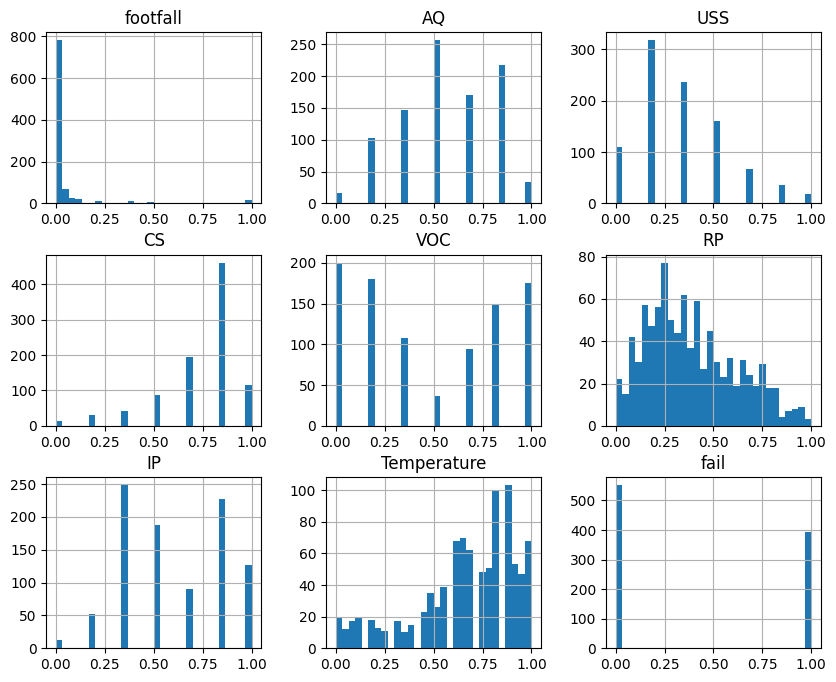

In [11]:
# Visualización de la distribución de las variables numéricas

sensors_data.hist(bins=30, figsize=(10, 8))
plt.show()

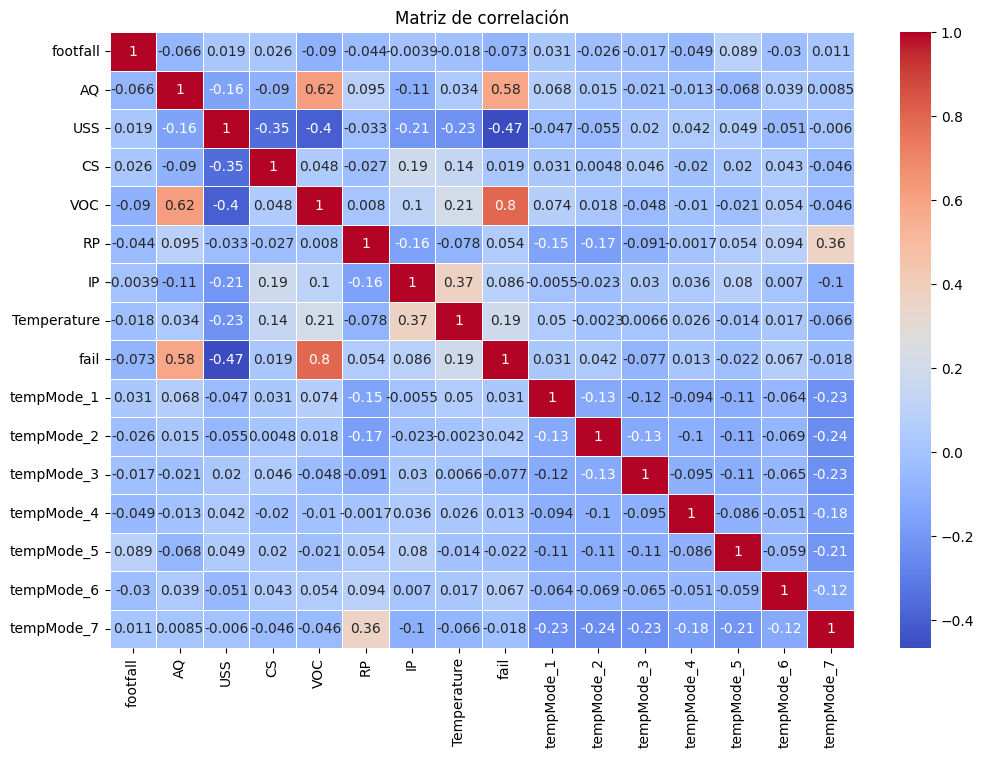

In [12]:
# Correlación entre variables

# Matriz de correlación
plt.figure(figsize=(12, 8))
correlation_matrix = sensors_data.corr()

# Mapa de calor (Heatmap) de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

In [13]:
# Varibales altamente correlacionadas
correlacion_fail = abs(sensors_data.corr()['fail'])

caracteristicas_relevantes = correlacion_fail[correlacion_fail>0.3]
caracteristicas_relevantes

,fail
AQ,0.583238
USS,0.466574
VOC,0.797329
fail,1.000000


In [14]:
# Creamos dataframe con las columnas que nos serán relevantes

relevant_sensors_data = sensors_data[['AQ', 'USS', 'VOC', 'fail']]
relevant_sensors_data.head()

,AQ,USS,VOC,fail
0,1.000000,0.000000,1.000000,1
1,0.333333,0.333333,0.166667,0
2,0.166667,0.166667,0.166667,0
3,0.333333,0.500000,0.166667,0
4,0.666667,0.833333,0.000000,0


## 4. Selección y entrenamiento de modelos

In [15]:
# Separamos características de la variable objetivo

X = relevant_sensors_data.drop('fail', axis=1)
y = relevant_sensors_data['fail']

In [16]:
# Dividimos los datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

### Random Forest

In [17]:
# Inicialización del modelo
randomForest_model = RandomForestClassifier(random_state=42)

# Entrenamiento del modelo
randomForest_model.fit(X_train, y_train)

# Evaluación usando validación cruzada
randomForest_cv_score = cross_val_score(randomForest_model, X_train, y_train, cv=5)

print(f"Random Forest CV Accuracy: {randomForest_cv_score.mean():.4f} ± {randomForest_cv_score.std():.4f}")

Random Forest CV Accuracy: 0.8993 ± 0.0207


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       102
           1       0.85      0.87      0.86        87

    accuracy                           0.87       189
   macro avg       0.87      0.87      0.87       189
weighted avg       0.87      0.87      0.87       189



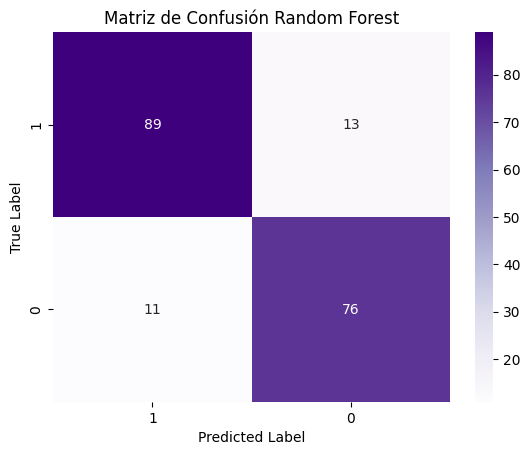

In [18]:
# Predicción con el conjunto de prueba

randomForest_prediction = randomForest_model.predict(X_test)

# Métrica de evaluación
print("Random Forest Classification Report:")
print(classification_report(y_test, randomForest_prediction))

# Matriz de confusión

randomForest_cm = confusion_matrix(y_test, randomForest_prediction)
plt.Figure(figsize=(14,5))
sns.heatmap(randomForest_cm,annot=True, fmt='d', cmap='Purples', xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de Confusión Random Forest')
plt.show()

### Logistic Regression

In [19]:
# Inicialización del modelo
logisticRegression_model = LogisticRegression(random_state=42)

# Entrenamiento del modelo
logisticRegression_model.fit(X_train, y_train)

# Evaluación usando validación cruzada
logisticRegression_cv_score = cross_val_score(logisticRegression_model, X_train, y_train, cv=5)

print(f"Logistic Regression CV Accuracy: {logisticRegression_cv_score.mean():.4f} ± {logisticRegression_cv_score.std():.4f}")

Logistic Regression CV Accuracy: 0.9205 ± 0.0139


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       102
           1       0.86      0.90      0.88        87

    accuracy                           0.88       189
   macro avg       0.88      0.88      0.88       189
weighted avg       0.88      0.88      0.88       189



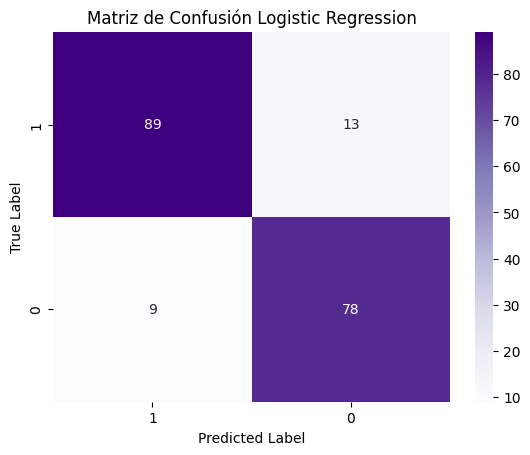

In [20]:
# Predicción con el conjunto de prueba

logisticRegression_prediction = logisticRegression_model.predict(X_test)

# Métrica de evaluación
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logisticRegression_prediction))

# Matriz de confusión

logisticRegression_cm = confusion_matrix(y_test, logisticRegression_prediction)
plt.Figure(figsize=(14,5))
sns.heatmap(logisticRegression_cm,annot=True, fmt='d', cmap='Purples', xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de Confusión Logistic Regression')
plt.show()

### Support Vector Machine

In [21]:
# Inicialización del modelo
svm_model = SVC(random_state=42)

# Entrenamiento del modelo
svm_model.fit(X_train, y_train)

# Evaluación usando validación cruzada
svm_cv_score = cross_val_score(svm_model, X_train, y_train, cv=5)

print(f"SVM CV Accuracy: {svm_cv_score.mean():.4f} ± {svm_cv_score.std():.4f}")

SVM CV Accuracy: 0.9152 ± 0.0153


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       102
           1       0.87      0.90      0.88        87

    accuracy                           0.89       189
   macro avg       0.89      0.89      0.89       189
weighted avg       0.89      0.89      0.89       189



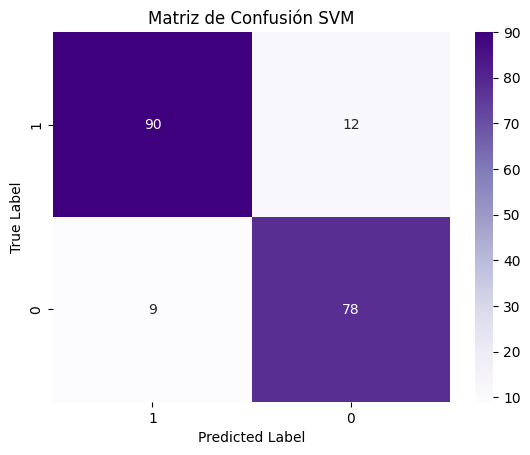

In [22]:
# Predicción con el conjunto de prueba

svm_prediction = svm_model.predict(X_test)

# Métrica de evaluación
print("SVM Classification Report:")
print(classification_report(y_test, svm_prediction))

# Matriz de confusión

svm_cm = confusion_matrix(y_test, svm_prediction)
plt.Figure(figsize=(14,5))
sns.heatmap(svm_cm,annot=True, fmt='d', cmap='Purples', xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de Confusión SVM')
plt.show()

## 5. Optimización

### Optimización Random Forest

In [23]:
# Optimización usando Grid Search de Random Forest

# Definimos los parámetros
randomForest_params = {
    'n_estimators':[100, 200],
    'max_depth':[10,20],
    'class_weight': ['balanced', None]
}

# Inicialización de Grid Search
randomForest_GS = GridSearchCV(RandomForestClassifier(random_state=42), randomForest_params, cv=5, scoring='accuracy')

# Entrenamiento de GridSearch para RandomForest
randomForest_GS.fit(X_train, y_train)

# Resultados
print("Mejores parámetros para Random Forest encontrados:", randomForest_GS.best_params_)
print("Mejor puntuación de validación cruzada para Random Forest:", randomForest_GS.best_score_)

Mejores parámetros para Random Forest encontrados: {'class_weight': 'balanced', 'max_depth': 10, 'n_estimators': 100}
Mejor puntuación de validación cruzada para Random Forest: 0.9033112582781456


Optimized Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       102
           1       0.84      0.89      0.86        87

    accuracy                           0.87       189
   macro avg       0.87      0.87      0.87       189
weighted avg       0.87      0.87      0.87       189



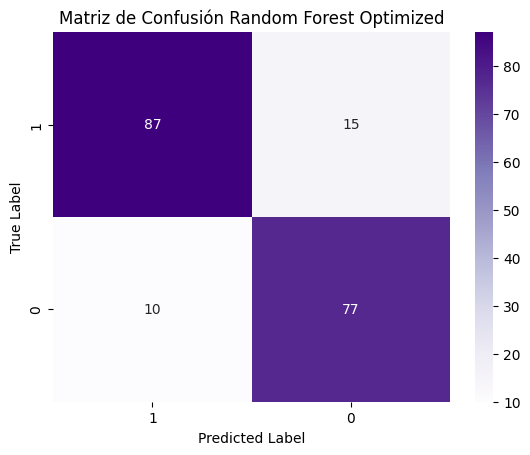

In [24]:
# Mejor modelo encontrado de Random Forest
best_randomForest_model = randomForest_GS.best_estimator_

# Predicción con el conjunto de prueba

optimized_randomForest_prediction = best_randomForest_model.predict(X_test)

# Métrica de evaluación
print("Optimized Random Forest Classification Report:")
print(classification_report(y_test, optimized_randomForest_prediction))

# Matriz de confusión

optimized_randomForest_cm = confusion_matrix(y_test, optimized_randomForest_prediction)
plt.Figure(figsize=(14,5))
sns.heatmap(optimized_randomForest_cm,annot=True, fmt='d', cmap='Purples', xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de Confusión Random Forest Optimized')
plt.show()

### Optimización Logistic Regression

In [25]:
# Optimización usando Grid Search de Logistic Regression

# Definimos los parámetros
logisticRegression_params = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Inicialización de Grid Search
logisticRegression_GS = GridSearchCV(LogisticRegression(random_state=42), logisticRegression_params, cv=5, scoring='accuracy')

# Entrenamiento de GridSearch para Logistic Regression
logisticRegression_GS.fit(X_train, y_train)

# Resultados
print("Mejores parámetros para Logistic Regression encontrados:", logisticRegression_GS.best_params_)
print("Mejor puntuación de validación cruzada para Logistic Regression:", logisticRegression_GS.best_score_)

Mejores parámetros para Logistic Regression encontrados: {'C': 1, 'solver': 'liblinear'}
Mejor puntuación de validación cruzada para Logistic Regression: 0.9218543046357617


Optimized Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       102
           1       0.85      0.90      0.87        87

    accuracy                           0.88       189
   macro avg       0.88      0.88      0.88       189
weighted avg       0.88      0.88      0.88       189



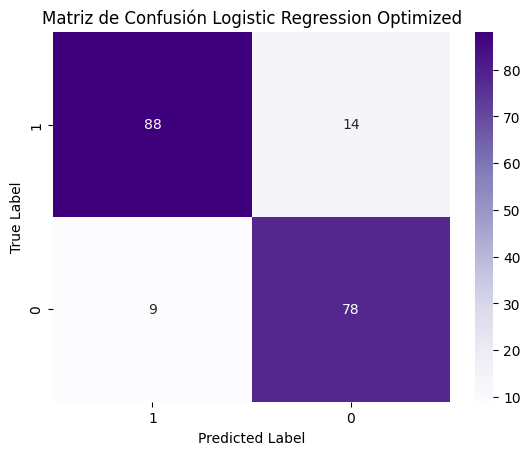

In [26]:
# Mejor modelo encontrado de Logistic Regression
best_logisticRegression_model = logisticRegression_GS.best_estimator_

# Predicción con el conjunto de prueba

optimized_logisticRegression_prediction = best_logisticRegression_model.predict(X_test)

# Métrica de evaluación
print("Optimized Logistic Regression Classification Report:")
print(classification_report(y_test, optimized_logisticRegression_prediction))

# Matriz de confusión

optimized_logisticRegression_cm = confusion_matrix(y_test, optimized_logisticRegression_prediction)
plt.Figure(figsize=(14,5))
sns.heatmap(optimized_logisticRegression_cm,annot=True, fmt='d', cmap='Purples', xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de Confusión Logistic Regression Optimized')
plt.show()

### Optimización Support Vector Machine

In [27]:
# Optimización usando Grid Search de SVM

# Definimos los parámetros
svm_params = {
    'C':[1.0,5.0,10.0,15.0,30.0,50.0],
    'kernel':['linear', 'rbf'],
    'gamma':[0.1,0.2,0.5,0.8,1.0],
}

# Inicialización de Grid Search
svm_GS = GridSearchCV(SVC(random_state=42), svm_params, cv=5, scoring='accuracy')

# Entrenamiento de GridSearch para Logistic Regression
svm_GS.fit(X_train, y_train)

# Resultados
print("Mejores parámetros para SVM encontrados:", svm_GS.best_params_)
print("Mejor puntuación de validación cruzada para SVM:", svm_GS.best_score_)

Mejores parámetros para SVM encontrados: {'C': 5.0, 'gamma': 0.5, 'kernel': 'rbf'}
Mejor puntuación de validación cruzada para SVM: 0.9245033112582781


Optimized SVM Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       102
           1       0.85      0.90      0.87        87

    accuracy                           0.88       189
   macro avg       0.88      0.88      0.88       189
weighted avg       0.88      0.88      0.88       189



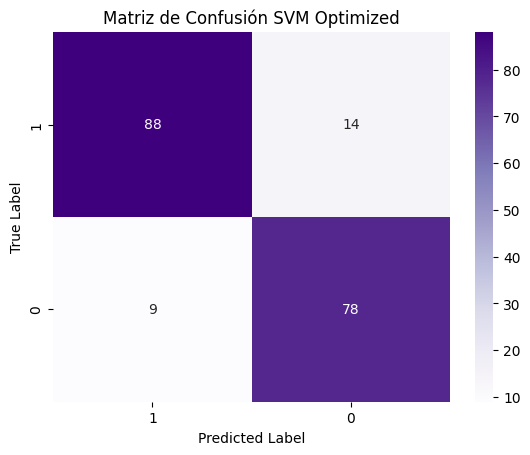

In [28]:
# Mejor modelo encontrado de SVM
best_svm_model = svm_GS.best_estimator_

# Predicción con el conjunto de prueba

optimized_svm_prediction = best_svm_model.predict(X_test)

# Métrica de evaluación
print("Optimized SVM Classification Report:")
print(classification_report(y_test, optimized_svm_prediction))

# Matriz de confusión

optimized_svm_cm = confusion_matrix(y_test, optimized_svm_prediction)
plt.Figure(figsize=(14,5))
sns.heatmap(optimized_svm_cm,annot=True, fmt='d', cmap='Purples', xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de Confusión SVM Optimized')
plt.show()